# Was ist Data Science?

"Wir ertrinken in Daten und hungern nach Wissen" (John Naisbitt, 1982, "Megatrends")

Daten --> Wissen

![DataScienceProcess](crisp_dm_process.jpg)

# Daten grob sichten

Verwendete Datensatz:

https://www.kaggle.com/competitions/ashrae-energy-prediction/data

In [1]:
verzeichnis = "/home/juebrauer/link_to_vcd/07_datasets/20_ashrae_energy_prediction_dataset"
!ls -lh $verzeichnis

total 2.5G
-rw-rw-r-- 1 juebrauer juebrauer  45K Oct 10  2019 building_metadata.csv
-rw-rw-r-- 1 juebrauer juebrauer 427M Oct 10  2019 sample_submission.csv
-rw-rw-r-- 1 juebrauer juebrauer 1.4G Oct 10  2019 test.csv
-rw-rw-r-- 1 juebrauer juebrauer 648M Oct 10  2019 train.csv
-rw-rw-r-- 1 juebrauer juebrauer  15M Oct 10  2019 weather_test.csv
-rw-rw-r-- 1 juebrauer juebrauer 7.2M Oct 10  2019 weather_train.csv


## Energiedatentabelle einlesen

In [2]:
import pandas

In [3]:
t_zaehler = pandas.read_csv(verzeichnis + "/train.csv")

In [4]:
t_zaehler

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [5]:
t_zaehler.shape

(20216100, 4)

In [6]:
t_zaehler["meter"].unique()

array([0, 3, 1, 2])

In [7]:
t_zaehler["meter"].nunique()

4

In [8]:
t_zaehler["meter"].value_counts()

0    12060910
1     4182440
2     2708713
3     1264037
Name: meter, dtype: int64

In [9]:
t_zaehler["building_id"].nunique()

1449

## Gebäudedatenmetatabelle einlesen

In [10]:
t_gebaeude = pandas.read_csv(verzeichnis + "/building_metadata.csv")

In [11]:
t_gebaeude

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [12]:
t_gebaeude["primary_use"].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [13]:
t_gebaeude.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [14]:
t_gebaeudetyp_anzahlen = t_gebaeude["primary_use"].value_counts()
t_gebaeudetyp_anzahlen

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [15]:
t_gebaeudetyp_anzahlen.index

Index(['Education', 'Office', 'Entertainment/public assembly',
       'Public services', 'Lodging/residential', 'Other', 'Healthcare',
       'Parking', 'Warehouse/storage', 'Manufacturing/industrial', 'Retail',
       'Services', 'Technology/science', 'Food sales and service', 'Utility',
       'Religious worship'],
      dtype='object')

In [16]:
t_gebaeudetyp_anzahlen.values

array([549, 279, 184, 156, 147,  25,  23,  22,  13,  12,  11,  10,   6,
         5,   4,   3])

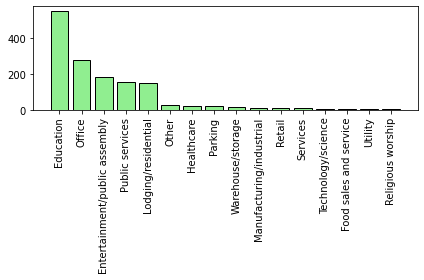

In [17]:
import matplotlib.pyplot as plt
plt.bar(t_gebaeudetyp_anzahlen.index, t_gebaeudetyp_anzahlen.values, color="lightgreen", edgecolor="black")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("gebaeudetyp_anzahlen.pdf")
plt.show()

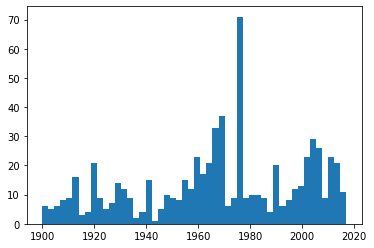

In [18]:
plt.hist( t_gebaeude["year_built"], bins=50 )
plt.show()

In [19]:
t_gebaeude["year_built"].value_counts()

1976.0    55
1966.0    23
1968.0    18
1919.0    17
1964.0    15
          ..
1926.0     1
1916.0     1
1922.0     1
2017.0     1
1937.0     1
Name: year_built, Length: 116, dtype: int64

In [20]:
t_gebaeude["floor_count"].value_counts()

1.0     109
2.0      67
4.0      37
3.0      33
5.0      25
6.0      25
8.0      19
7.0      14
9.0       8
11.0      5
10.0      4
12.0      2
13.0      2
16.0      1
14.0      1
21.0      1
26.0      1
19.0      1
Name: floor_count, dtype: int64

# Analyse #1: Verbrauchen große Gebäude auch mehr Strom?

## Nur Stromzaehlerdaten betrachten

In [21]:
t_strom = t_zaehler.query("meter == 0")
t_strom

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [22]:
t_strom.query("building_id==0")

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
2301,0,0,2016-01-01 01:00:00,0.000
4594,0,0,2016-01-01 02:00:00,0.000
6893,0,0,2016-01-01 03:00:00,0.000
9189,0,0,2016-01-01 04:00:00,0.000
...,...,...,...,...
20204274,0,0,2016-12-31 19:00:00,232.071
20206637,0,0,2016-12-31 20:00:00,189.069
20209003,0,0,2016-12-31 21:00:00,169.958
20211368,0,0,2016-12-31 22:00:00,169.958


## Mittleren Stromverbrauch pro Gebäude ausrechnen

In [23]:
t_stromverbrauch_pro_gebaeude = pandas.pivot_table(t_strom, columns="building_id").transpose()

In [24]:
t_stromverbrauch_pro_gebaeude

,meter,meter_reading
building_id,,
0,0.0,146.454978
1,0.0,74.865393
2,0.0,14.551385
3,0.0,235.549966
4,0.0,976.556746
...,...,...
1444,0.0,7.482127
1445,0.0,4.732815
1446,0.0,3.592162


## Zwei Tabellen verknüpfen

In [25]:
t_gebaeude

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [26]:
t_gebaeude_infos = t_stromverbrauch_pro_gebaeude.join(t_gebaeude, on="building_id")

In [27]:
t_gebaeude_infos

,meter,meter_reading,site_id,building_id,primary_use,square_feet,year_built,floor_count
building_id,,,,,,,,
0,0.0,146.454978,0,0,Education,7432,2008.0,NaN
1,0.0,74.865393,0,1,Education,2720,2004.0,NaN
2,0.0,14.551385,0,2,Education,5376,1991.0,NaN
3,0.0,235.549966,0,3,Education,23685,2002.0,NaN
4,0.0,976.556746,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...,...,...
1444,0.0,7.482127,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,0.0,4.732815,15,1445,Education,4298,NaN,NaN
1446,0.0,3.592162,15,1446,Entertainment/public assembly,11265,1997.0,NaN


## Um so größer Square Feet, um so größer Stromverbrauch/h?

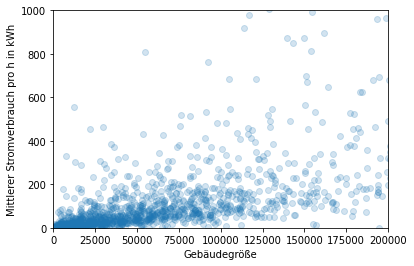

In [28]:
plt.scatter(t_gebaeude_infos["square_feet"], t_gebaeude_infos["meter_reading"], alpha=0.2)
plt.xlabel("Gebäudegröße")
plt.ylabel("Mittlerer Stromverbrauch pro h in kWh")
plt.xlim(0,200000)
plt.ylim(0,1000)
plt.show()

In [29]:
t_gebaeude_infos.corr()

,meter,meter_reading,site_id,building_id,square_feet,year_built,floor_count
meter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meter_reading,NaN,1.000000,0.026400,0.018986,0.620161,0.116423,0.408985
site_id,NaN,0.026400,1.000000,0.977197,0.086960,-0.190646,-0.471119
building_id,NaN,0.018986,0.977197,1.000000,0.078600,-0.233495,-0.484977
square_feet,NaN,0.620161,0.086960,0.078600,1.000000,0.110153,0.537979
year_built,NaN,0.116423,-0.190646,-0.233495,0.110153,1.000000,0.100369
floor_count,NaN,0.408985,-0.471119,-0.484977,0.537979,0.100369,1.000000


# Analyse #2: Welche Gebäudearten verbrauchen am meisten Strom?

## Größe der Gebäude wird ignoriert

In [30]:
t_gebaeude_infos

,meter,meter_reading,site_id,building_id,primary_use,square_feet,year_built,floor_count
building_id,,,,,,,,
0,0.0,146.454978,0,0,Education,7432,2008.0,NaN
1,0.0,74.865393,0,1,Education,2720,2004.0,NaN
2,0.0,14.551385,0,2,Education,5376,1991.0,NaN
3,0.0,235.549966,0,3,Education,23685,2002.0,NaN
4,0.0,976.556746,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...,...,...
1444,0.0,7.482127,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,0.0,4.732815,15,1445,Education,4298,NaN,NaN
1446,0.0,3.592162,15,1446,Entertainment/public assembly,11265,1997.0,NaN


In [31]:
t_stromverbrauch_nach_gebaeudeart = pandas.pivot_table(t_gebaeude_infos, columns="primary_use").transpose()

In [32]:
t_stromverbrauch_nach_gebaeudeart

,building_id,floor_count,meter,meter_reading,site_id,square_feet,year_built
primary_use,,,,,,,
Education,678.798883,4.745562,0.0,243.955782,6.277467,104080.847300,1962.711599
Entertainment/public assembly,707.636872,2.089286,0.0,115.423188,6.541899,80438.044693,1971.222222
Food sales and service,815.400000,NaN,0.0,94.784997,9.000000,38485.000000,2012.000000
Healthcare,965.476190,1.000000,0.0,297.200460,9.714286,137171.190476,1981.142857
Lodging/residential,725.793103,6.333333,0.0,107.397001,7.110345,85803.724138,1973.988095
Manufacturing/industrial,1057.100000,1.666667,0.0,89.378830,11.000000,45033.000000,1955.200000
Office,821.933086,3.725000,0.0,157.706777,8.572491,87329.457249,1973.095238
Other,678.120000,1.076923,0.0,67.647985,6.320000,31456.560000,1981.500000
Parking,528.227273,2.666667,0.0,57.334534,5.090909,279341.772727,1998.500000


In [33]:
t_stromverbrauch_nach_gebaeudeart.sort_values("meter_reading")

,building_id,floor_count,meter,meter_reading,site_id,square_feet,year_built
primary_use,,,,,,,
Religious worship,692.333333,NaN,0.0,4.713664,6.666667,11276.666667,1979.000000
Warehouse/storage,651.000000,1.000000,0.0,50.755673,6.166667,47794.666667,1983.400000
Parking,528.227273,2.666667,0.0,57.334534,5.090909,279341.772727,1998.500000
Other,678.120000,1.076923,0.0,67.647985,6.320000,31456.560000,1981.500000
Manufacturing/industrial,1057.100000,1.666667,0.0,89.378830,11.000000,45033.000000,1955.200000
Services,1035.777778,NaN,0.0,92.201966,10.777778,221656.666667,NaN
Food sales and service,815.400000,NaN,0.0,94.784997,9.000000,38485.000000,2012.000000
Public services,623.412903,2.048780,0.0,99.382442,5.380645,65116.806452,1964.333333
Lodging/residential,725.793103,6.333333,0.0,107.397001,7.110345,85803.724138,1973.988095


## Mittlerer Stromverbrauch in kWh pro qm nach Gebäudeart 

In [34]:
t_stromverbrauch_nach_gebaeudeart["strom_pro_qm"] = t_stromverbrauch_nach_gebaeudeart["meter_reading"] \
                                                    / t_stromverbrauch_nach_gebaeudeart["square_feet"] * 10.7639

In [35]:
t_stromverbrauch_nach_gebaeudeart

,building_id,floor_count,meter,meter_reading,site_id,square_feet,year_built,strom_pro_qm
primary_use,,,,,,,,
Education,678.798883,4.745562,0.0,243.955782,6.277467,104080.847300,1962.711599,0.025230
Entertainment/public assembly,707.636872,2.089286,0.0,115.423188,6.541899,80438.044693,1971.222222,0.015445
Food sales and service,815.400000,NaN,0.0,94.784997,9.000000,38485.000000,2012.000000,0.026510
Healthcare,965.476190,1.000000,0.0,297.200460,9.714286,137171.190476,1981.142857,0.023321
Lodging/residential,725.793103,6.333333,0.0,107.397001,7.110345,85803.724138,1973.988095,0.013473
Manufacturing/industrial,1057.100000,1.666667,0.0,89.378830,11.000000,45033.000000,1955.200000,0.021364
Office,821.933086,3.725000,0.0,157.706777,8.572491,87329.457249,1973.095238,0.019438
Other,678.120000,1.076923,0.0,67.647985,6.320000,31456.560000,1981.500000,0.023148
Parking,528.227273,2.666667,0.0,57.334534,5.090909,279341.772727,1998.500000,0.002209


In [36]:
t_stromverbrauch_nach_gebaeudeart.sort_values("strom_pro_qm")

,building_id,floor_count,meter,meter_reading,site_id,square_feet,year_built,strom_pro_qm
primary_use,,,,,,,,
Parking,528.227273,2.666667,0.0,57.334534,5.090909,279341.772727,1998.500000,0.002209
Services,1035.777778,NaN,0.0,92.201966,10.777778,221656.666667,NaN,0.004477
Religious worship,692.333333,NaN,0.0,4.713664,6.666667,11276.666667,1979.000000,0.004499
Warehouse/storage,651.000000,1.000000,0.0,50.755673,6.166667,47794.666667,1983.400000,0.011431
Lodging/residential,725.793103,6.333333,0.0,107.397001,7.110345,85803.724138,1973.988095,0.013473
Entertainment/public assembly,707.636872,2.089286,0.0,115.423188,6.541899,80438.044693,1971.222222,0.015445
Public services,623.412903,2.048780,0.0,99.382442,5.380645,65116.806452,1964.333333,0.016428
Office,821.933086,3.725000,0.0,157.706777,8.572491,87329.457249,1973.095238,0.019438
Technology/science,949.833333,5.000000,0.0,112.738960,9.666667,59176.333333,1939.000000,0.020507


## Plausibilisierung der Ergebnisse

In [37]:
t_stromverbrauch_nach_gebaeudeart.loc["Office"]["strom_pro_qm"] * 24 * 365

170.27988808993192

Mit de Google-Suchbegriffen

    office energy consumption per square meter per year
    
erhalten wir u.a. folgenden Link:

https://www.skanska.pl/4a58d8/siteassets/oferta/biura/raporty-i-standardy/raport-zuycia-energii-w-budynkach-biurowych/energy-consumption-in-office-buildings-report.pdf

Dort steht z.B. auf S. 14:

    The average electricity consumption, around
    160 kWh/m2, was comparable to the results of
    analyses presented in a 2014 report entitled
    “Operational Costs of Office Buildings”, covering
    48 properties, prepared by the Construction
    Marketing Group together with partners.



# Analyse #3: Eine einzelne Stromverbrauchskurve mal plotten

In [38]:
t_zaehler

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [39]:
t_zaehler.dtypes

building_id        int64
meter              int64
timestamp         object
meter_reading    float64
dtype: object

In [40]:
t_zaehler["timestamp"] = pandas.to_datetime( t_zaehler["timestamp"] )

In [41]:
t_zaehler.dtypes

building_id               int64
meter                     int64
timestamp        datetime64[ns]
meter_reading           float64
dtype: object

In [42]:
t_zaehler.set_index("timestamp", inplace=True)

In [43]:
zr = t_zaehler.query("meter==0 and building_id==300")["meter_reading"]
zr

timestamp
2016-01-06 01:00:00    136.59
2016-01-06 02:00:00    142.68
2016-01-06 03:00:00    142.09
2016-01-06 04:00:00    144.51
2016-01-06 05:00:00    145.80
                        ...  
2016-12-31 19:00:00    165.17
2016-12-31 20:00:00    166.48
2016-12-31 21:00:00    176.89
2016-12-31 22:00:00     68.31
2016-12-31 23:00:00     64.07
Name: meter_reading, Length: 8637, dtype: float64

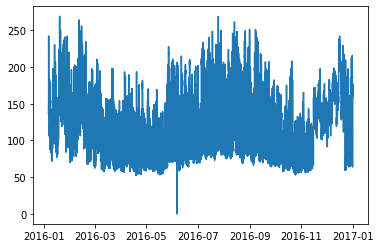

In [44]:
plt.plot(zr)
plt.show()

Um was für eine Gebäudeart handelt es sich hier?

In [45]:
t_gebaeude_infos.loc[300]

meter                   0.0
meter_reading    127.815112
site_id                   3
building_id             300
primary_use       Education
square_feet           62800
year_built           2014.0
floor_count             NaN
Name: 300, dtype: object

Also um eine Schule, Uni, etc.

# Analyse #4: Mittlerer Stromverbrauch über den Tag für Büros

## Welche Gebäude sind Büros?

In [46]:
t_gebaeude.query("primary_use=='Office'")

,site_id,building_id,primary_use,square_feet,year_built,floor_count
9,0,9,Office,27000,2010.0,NaN
15,0,15,Office,83957,1974.0,NaN
17,0,17,Office,15250,1980.0,NaN
19,0,19,Office,18717,2004.0,NaN
21,0,21,Office,7043,1990.0,NaN
...,...,...,...,...,...,...
1381,15,1381,Office,84615,1963.0,NaN
1387,15,1387,Office,187041,1973.0,NaN
1410,15,1410,Office,11524,1994.0,NaN
1430,15,1430,Office,53303,1981.0,NaN


In [47]:
bueros = list(t_gebaeude.query("primary_use=='Office'")["building_id"])
bueros[:20]

[9, 15, 17, 19, 21, 25, 26, 28, 32, 38, 39, 41, 53, 55, 79, 80, 82, 84, 92, 93]

## Filtern der Zählerdaten nach Büros + Strom

In [48]:
t_zaehler["building_id"].isin( bueros )

timestamp
2016-01-01 00:00:00    False
2016-01-01 00:00:00    False
2016-01-01 00:00:00    False
2016-01-01 00:00:00    False
2016-01-01 00:00:00    False
                       ...  
2016-12-31 23:00:00    False
2016-12-31 23:00:00    False
2016-12-31 23:00:00    False
2016-12-31 23:00:00    False
2016-12-31 23:00:00     True
Name: building_id, Length: 20216100, dtype: bool

In [49]:
t_zaehler_nur_bueros = t_zaehler[ t_zaehler["building_id"].isin( bueros ) ]
t_zaehler_nur_bueros

,building_id,meter,meter_reading
timestamp,,,
2016-01-01 00:00:00,9,0,0.000
2016-01-01 00:00:00,15,0,0.000
2016-01-01 00:00:00,17,0,0.000
2016-01-01 00:00:00,19,0,0.000
2016-01-01 00:00:00,21,0,0.000
...,...,...,...
2016-12-31 23:00:00,1387,2,967.831
2016-12-31 23:00:00,1410,0,5.650
2016-12-31 23:00:00,1410,1,16.700


In [50]:
t_nur_bueros_strom = t_zaehler_nur_bueros.query("meter == 0")
t_nur_bueros_strom

,building_id,meter,meter_reading
timestamp,,,
2016-01-01 00:00:00,9,0,0.000
2016-01-01 00:00:00,15,0,0.000
2016-01-01 00:00:00,17,0,0.000
2016-01-01 00:00:00,19,0,0.000
2016-01-01 00:00:00,21,0,0.000
...,...,...,...
2016-12-31 23:00:00,1379,0,94.925
2016-12-31 23:00:00,1381,0,60.925
2016-12-31 23:00:00,1387,0,151.300


## Zeitliche Filterung nach Stunden

In [51]:
t_nur_bueros_strom.between_time("22:00:00", "22:59:00")

,building_id,meter,meter_reading
timestamp,,,
2016-01-01 22:00:00,9,0,0.000
2016-01-01 22:00:00,15,0,0.000
2016-01-01 22:00:00,17,0,0.000
2016-01-01 22:00:00,19,0,0.000
2016-01-01 22:00:00,21,0,0.000
...,...,...,...
2016-12-31 22:00:00,1379,0,96.000
2016-12-31 22:00:00,1381,0,58.300
2016-12-31 22:00:00,1387,0,146.650


In [52]:
t_nur_bueros_strom.between_time("22:00:00", "22:59:00")["meter_reading"].mean()

143.44831426584605

## Durchschnittlicher Stromverbrauch pro Stunde in einem Büro

In [53]:
stunden = []
verbrauch = []

for stunde in range(0,24):
    mittlerer_stromverbrauch = t_nur_bueros_strom.between_time(f"{stunde}:00:00", f"{stunde}:59:00")["meter_reading"].mean()
    print(stunde, "-->", mittlerer_stromverbrauch, "kWh")
    stunden.append( stunde )
    verbrauch.append( mittlerer_stromverbrauch )

0 --> 133.24834942903414 kWh
1 --> 132.27213102749334 kWh
2 --> 130.43943333644967 kWh
3 --> 129.50009786005754 kWh
4 --> 129.95724657212855 kWh
5 --> 132.9850862516482 kWh
6 --> 141.26991588317165 kWh
7 --> 152.40430391737152 kWh
8 --> 162.01156465233248 kWh
9 --> 170.58165412647597 kWh
10 --> 176.00867686328303 kWh
11 --> 180.46306094376882 kWh
12 --> 183.3919149581666 kWh
13 --> 185.24284686931483 kWh
14 --> 185.66674096755077 kWh
15 --> 185.40938748375152 kWh
16 --> 182.9197950187706 kWh
17 --> 177.3838382717204 kWh
18 --> 167.55907227836926 kWh
19 --> 158.96464306275246 kWh
20 --> 153.5844811962085 kWh
21 --> 148.82797214124048 kWh
22 --> 143.44831426584605 kWh
23 --> 136.7112449142074 kWh


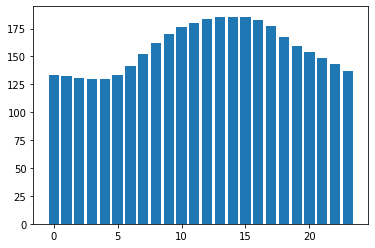

In [54]:
plt.bar(stunden, verbrauch)
plt.show()